In [2]:
%pylab inline

import numpy as np

from PIL import Image

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


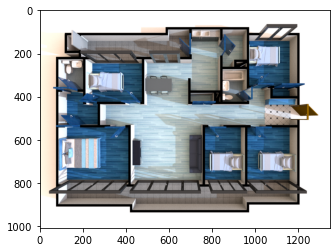

In [3]:
img_path = 'img/zigbang.png'
img = cv2.imread(img_path) #, cv2.IMREAD_COLOR)  #,cv2.COLOR_BGR2RGB )
plt.imshow(img)

In [4]:
img = cv2.imread(img_path) 
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

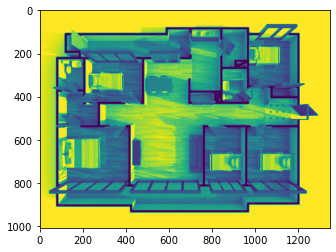

In [5]:
# Read image as gray-scale
img_org = cv2.imread(img_path, cv2.IMREAD_COLOR)
# Convert to gray-scale
img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(img_gray, 5)
# Apply hough transform on the image
plt.imshow(img_blur)

In [6]:
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=200, param2=10, minRadius=5, maxRadius=30)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)


In [7]:
template = cv2.imread('img/template.png')
template = cv2.cvtColor(template, cv2.IMREAD_GRAYSCALE) 

True

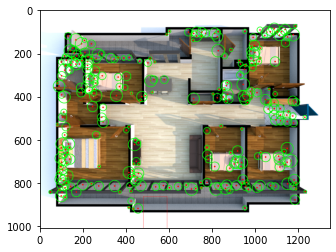

In [8]:
result = cv2.matchTemplate(img , template, cv2.TM_CCOEFF_NORMED)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
x, y = minLoc
w, h = template.shape[:2]


startX, startY = maxLoc # 만약 cv.TM_SQDIFF 혹은 cv.TM_SQDIFF_NORMED를 사용했을경우 최솟값을 사용해야한다.
endX, endY = startX + w, startY + h
output = cv2.rectangle(img, (startX, startY), (endX, endY), (0,0,255), 1)

image_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

cv2.imwrite('result.png', img)


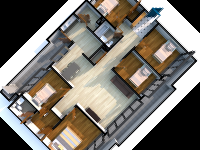

In [9]:
img = Image.open(img_path).resize((200, 150)).rotate(45)
img